This project aims to predict the movement of assets based on quantitative analysis and machine learning. This is an ongoing project. Data is collected from tdameritrade api, https://developer.tdameritrade.com.  Quantitative analysis techniques will be used to make predictions and then compared with machine learning techniques. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from datetime import datetime
import requests
from api_key import api_key # api_key was saved in an api_key.py file

In [2]:
# creating api url request
symbol = input().upper()
url = 'https://api.tdameritrade.com/v1/marketdata/{}/pricehistory'.format(symbol)


APPL


In [3]:
# refer to tdameritrade documentation for parameters.
payload = {'apikey': api_key,
          'periodType': 'year',
          'period': '20',
          'frequencyType': 'daily',
          'frequency': '1'}


# retrieving historically price function and returns a response string object


def historicalPrice(symbols):
    if isinstance(symbols, dict):
        price = {}
        for symbol in symbols.values():
            url = 'https://api.tdameritrade.com/v1/marketdata/{}/pricehistory'.format(symbol)
            # extracting the response object into json format
            price[symbol] = requests.get(url, payload).json()
    else:
        url = 'https://api.tdameritrade.com/v1/marketdata/{}/pricehistory'.format(symbols)
        price = requests.get(url, payload).json()
    return price

In [4]:
# converting miliseconds to datetime format. Also add additional day to get current date.
def daily_datetime(data):
    df=data
    df['datetime'] = df['datetime'].map(lambda x: datetime.fromtimestamp((x + 86400000) / 1000))
    df['datetime'] = df['datetime'].map(lambda x: datetime.strptime(str(x).split(' ')[0], '%Y-%m-%d'))
    return df

NameError: name 'cleaned_data' is not defined

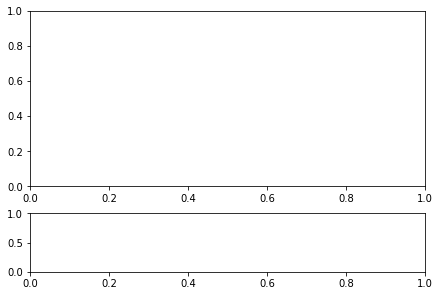

In [5]:
# plot using matplotlib 
import matplotlib.gridspec as gridspec

fig = plt.figure(constrained_layout=True)
gs = gridspec.GridSpec(4,4, fig)
ax_price = fig.add_subplot(gs[:3,:])
ax_vol = fig.add_subplot(gs[3,:])

x = cleaned_data['datetime']
y_price = cleaned_data['close']
y_vol = cleaned_data['volume']

ax_price.plot(x,y_price)
ax_vol.bar(x,y_vol)

In [6]:
import os


In [7]:
os.system('say "Retrieving is done"')

0

In [8]:
# Spider Sectors

sectors = {'Communication Services': 'XLC', 'Consumer Discretionary': 'XLY', 'Consumer Staples': 'XLP',
          'Energy': 'XLE', 'Financials': 'XLF', 'Health Care': 'XLV', 'Industrials': 'XLI', 'Materials': 'XLB',
          'Real Estate': 'XLRE', 'Technology': 'XLK', 'Utilities': 'XLU'}

In [9]:
x=historicalPrice(sectors)

In [10]:
# loading json dictionary into a dataframe
XLC = pd.json_normalize(x['XLK'], 'candles')
daily_datetime(XLC)

,open,high,low,close,volume,datetime
0,16.17,16.20,15.47,15.58,1090100,2002-07-08
1,15.56,15.76,15.31,15.35,397600,2002-07-09
2,15.45,15.56,14.94,14.94,907900,2002-07-10
3,14.85,15.49,14.68,15.49,1277900,2002-07-11
4,15.85,15.85,15.29,15.42,1111100,2002-07-12
...,...,...,...,...,...,...
5033,127.13,128.72,125.11,127.12,7860161,2022-06-30
5034,126.32,127.73,125.23,127.41,6965317,2022-07-01
5035,125.68,129.04,124.96,129.01,7170535,2022-07-05
5036,129.29,131.16,128.65,130.12,8083462,2022-07-06
